## Applied

8) Simple Linear Regression on the Auto data set

(a) Simple linear regression with 'mpg' as response and 'horsepower' as predictor

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
auto = pd.read_csv('./data/Auto.csv')

In [15]:
X = auto['horsepower']
Y = auto['mpg']

X.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [16]:
Y.unique()

array([18. , 15. , 16. , 17. , 14. , 24. , 22. , 21. , 27. , 26. , 25. ,
       10. , 11. ,  9. , 28. , 19. , 12. , 13. , 23. , 30. , 31. , 35. ,
       20. , 29. , 32. , 33. , 17.5, 15.5, 14.5, 22.5, 24.5, 18.5, 29.5,
       26.5, 16.5, 31.5, 36. , 25.5, 33.5, 20.5, 30.5, 21.5, 43.1, 36.1,
       32.8, 39.4, 19.9, 19.4, 20.2, 19.2, 25.1, 20.6, 20.8, 18.6, 18.1,
       17.7, 27.5, 27.2, 30.9, 21.1, 23.2, 23.8, 23.9, 20.3, 21.6, 16.2,
       19.8, 22.3, 17.6, 18.2, 16.9, 31.9, 34.1, 35.7, 27.4, 25.4, 34.2,
       34.5, 31.8, 37.3, 28.4, 28.8, 26.8, 41.5, 38.1, 32.1, 37.2, 26.4,
       24.3, 19.1, 34.3, 29.8, 31.3, 37. , 32.2, 46.6, 27.9, 40.8, 44.3,
       43.4, 36.4, 44.6, 40.9, 33.8, 32.7, 23.7, 23.6, 32.4, 26.6, 25.8,
       23.5, 39.1, 39. , 35.1, 32.3, 37.7, 34.7, 34.4, 29.9, 33.7, 32.9,
       31.6, 28.1, 30.7, 24.2, 22.4, 34. , 38. , 44. ])

In [25]:
remList = X[X == '?'].index 
X = X.drop(remList)
Y = Y.drop(remList)

dict1 = {'horsepower':X.astype('float'), 'mpg':Y.as}
df = pd.DataFrame(dict1)
df.head()

,horsepower,mpg
0,130.0,18.0
1,165.0,15.0
2,150.0,18.0
3,150.0,16.0
4,140.0,17.0


In [9]:
import statsmodels.formula.api as smf 
import statsmodels.api as sm

In [26]:
lmodel = smf.ols(formula='mpg ~ horsepower', data = df)
res = lmodel.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sat, 18 Jan 2020   Prob (F-statistic):           7.03e-81
Time:                        00:29:22   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

In [27]:
print(res.params)

Intercept     39.935861
horsepower    -0.157845
dtype: float64


(i) From above, we can see that the p-value is negligible for the predictor ('horsepower'). Hence, we can say that there is a relationship between the predictor ('horsepower') and the repsonse ('mpg').

(ii) From above, we can see that the R-squared value for the model fit is 0.606, meaning that 60.6% of the variance in 'mpg' is due to 'horsepower'.

(iii) From above, we can see that the coefficient of 'horsepower' has negative sign. Hence, the relationship is negative.

(iv) mpg = 39.9359 - 0.1578*horsepower

For horsepower=98, we get mpg = 24.4895

TODO: confidence interval and prediction interval

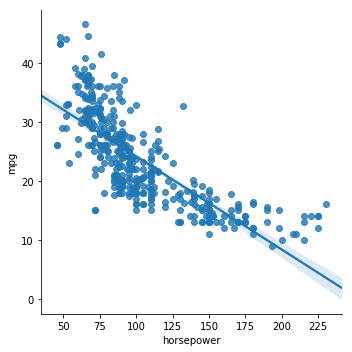

In [31]:
sns.lmplot('horsepower','mpg',df)

In [32]:
model_fitted_y = res.fittedvalues
model_residuals = res.resid
model_norm_residuals = res.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
model_abs_resid = np.abs(model_residuals)

model_leverage = res.get_influence().hat_matrix_diag
model_cooks = res.get_influence().cooks_distance[0]

Text(0,0.5,'Residuals')

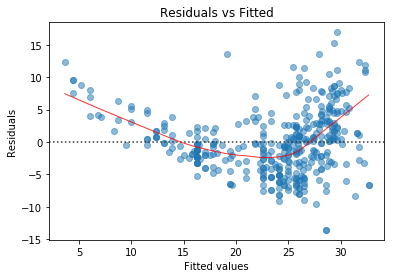

In [33]:
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y,Y, lowess=True, scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

The bow-shaped pattern clearly indicates that there is some non-linearity in the model which we have not captured.

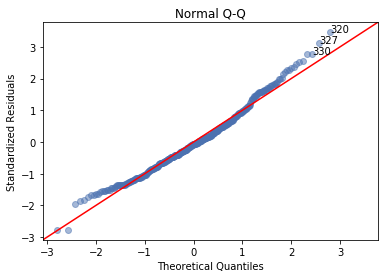

In [35]:
from statsmodels.graphics.gofplots import ProbPlot
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

We see that the errors are slightly away from the red line at the edges. So, the errors are not so normally distributed.

KeyError: 330

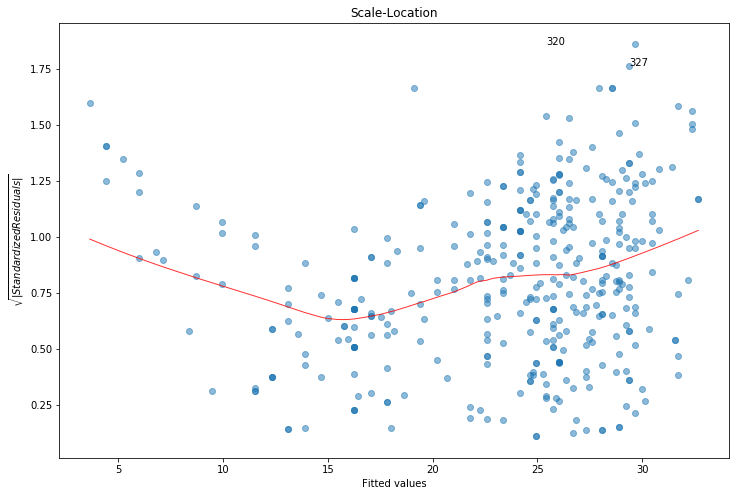

In [37]:
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');


for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i,xy=(model_fitted_y[i], model_norm_residuals_abs_sqrt[i]));

Presence of the pattern as seen above clearly indicates lack of homoscedasticity.

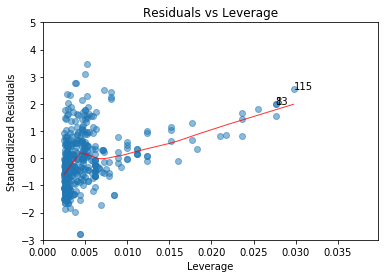

In [38]:
plot_lm_4 = plt.figure();
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
sns.regplot(model_leverage, model_norm_residuals,scatter=False,ci=False,lowess=True,line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i,xy=(model_leverage[i],model_norm_residuals[i]))

As we can see, there are no leverage points in our dataset.

9) Multiple linear regression on 'Auto' data set.

In [108]:
auto1=auto.drop(['name'],axis=1)
#auto1.head()
auto1[auto1['horsepower']=='?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
32,25.0,4,98.0,?,2046,19.0,71,1
126,21.0,6,200.0,?,2875,17.0,74,1
330,40.9,4,85.0,?,1835,17.3,80,2
336,23.6,4,140.0,?,2905,14.3,80,1
354,34.5,4,100.0,?,2320,15.8,81,2


In [110]:
remList = auto1[auto1['horsepower']=='?'].index
auto1 = auto1.drop(remList)

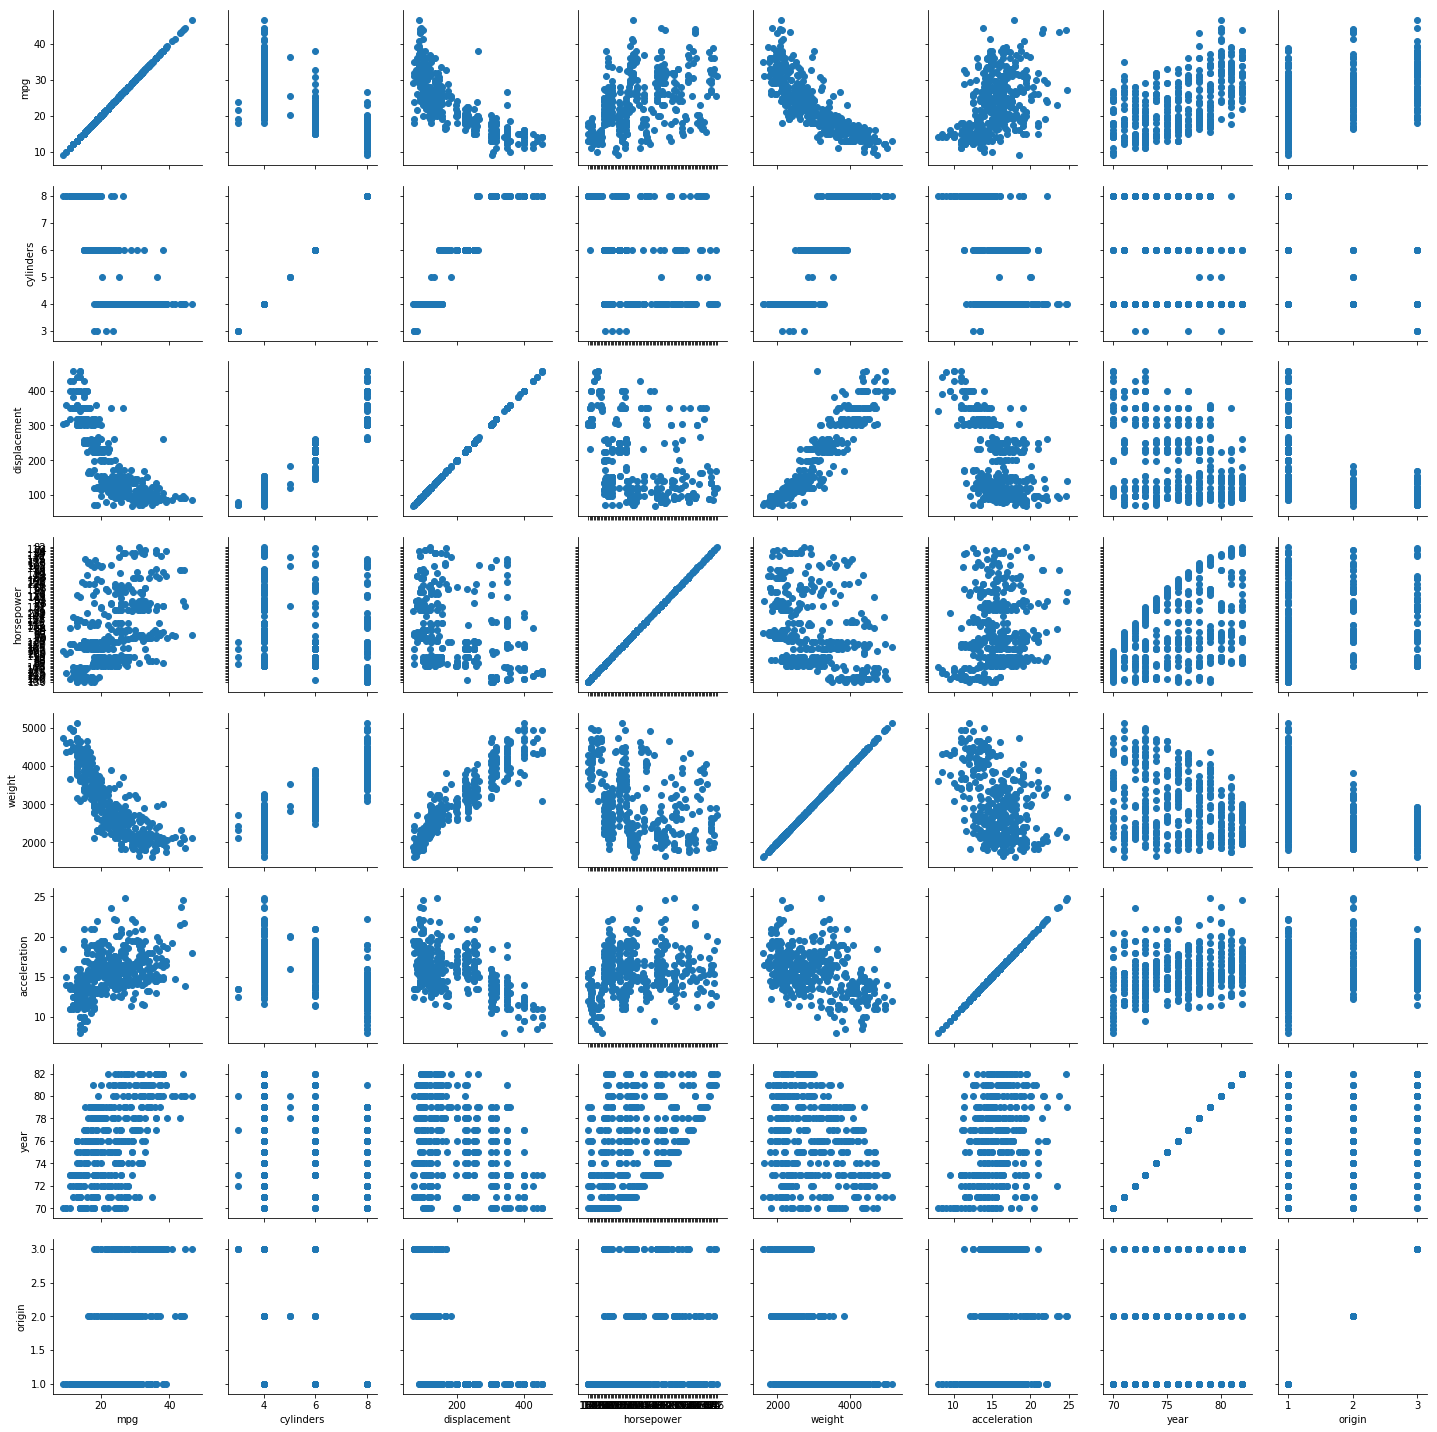

In [111]:
g = sns.PairGrid(auto1)
g = g.map(plt.scatter)

In [112]:
auto_corr = auto1.corr()
auto_corr

,mpg,cylinders,displacement,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.932994,-0.543800,-0.369855,-0.614535
weight,-0.832244,0.897527,0.932994,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.585005,0.212746,0.181528,1.000000


In [113]:
Y2 = auto1['mpg']
X2 = auto1.drop(['mpg'],axis=1)
#X2 = auto1[['cylinders','displacement','weight','acceleration','year','origin']]

In [114]:
X2 = sm.add_constant(X2)
X2.isnull().any()
X2.isna().any()
X2.dtypes

const           float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
dtype: object

In [115]:
# OLS model for mulptiple linear regression
lmodel2 = sm.OLS(Y2,X2.astype(float))
res2 = lmodel2.fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sat, 18 Jan 2020   Prob (F-statistic):          2.04e-139
Time:                        07:51:50   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

9.c.i) As we can see from the summary, the high F-statistic implies there is a clear relationship between predictors and the response

9.c.ii) displacement, weight, year, origin

9.c.iii) The coefficient of the year suggests that the response 'mpg' is positively correlated with 'year' variable. The t-statistic is the highest among all other predictors implying that it clearly influences the 'mpg' response variable. So, the more recent the car, the higher mpg it has - in general, if we increase the 'year' by 1 keeping all other variables constant, it would lead to an increase of 0.75 in 'mpg'.

9.d)

In [116]:
model_fitted_y = res2.fittedvalues
model_residuals = res2.resid
model_norm_residuals = res2.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
model_abs_resid = np.abs(model_residuals)

model_leverage = res2.get_influence().hat_matrix_diag
model_cooks = res2.get_influence().cooks_distance[0]

Text(0,0.5,'Residuals')

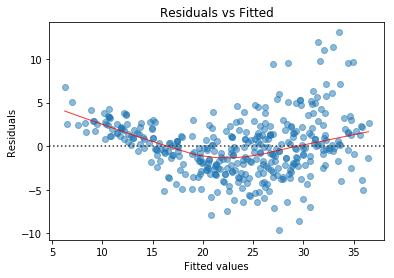

In [117]:
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y,Y, lowess=True, scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

We can see that there is some non-linearity which has not yet been explained by the model.

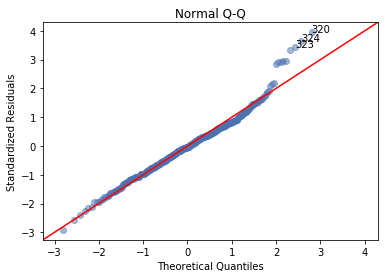

In [118]:
from statsmodels.graphics.gofplots import ProbPlot
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

From the Q-Q plot, we can see that there are certain observations towards the end that are quite far from the red line indicating that the errors are not normally distributed.

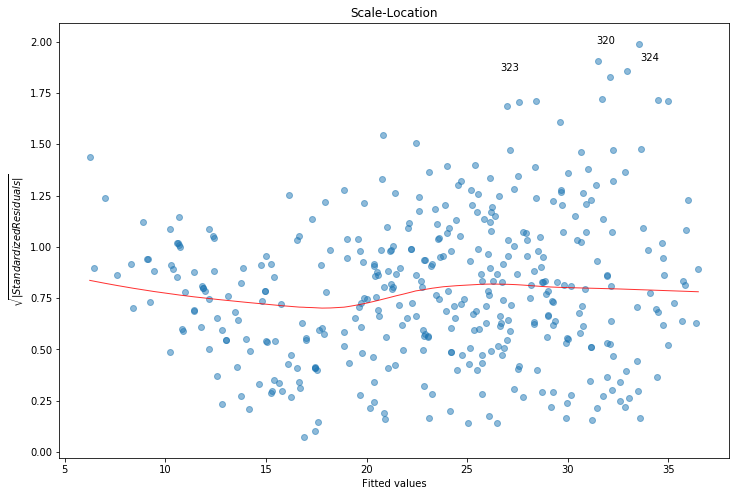

In [119]:
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');


for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i,xy=(model_fitted_y[i], model_norm_residuals_abs_sqrt[i]));

The funnel shape indicates heteroscedasticity.

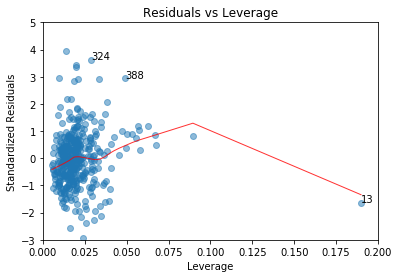

In [120]:
plot_lm_4 = plt.figure();
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
sns.regplot(model_leverage, model_norm_residuals,scatter=False,ci=False,lowess=True,line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i,xy=(model_leverage[i],model_norm_residuals[i]))

As we can see from the Residuals vs Leverage plot, there are no high leverage observations. The observation 13 should still be removed for evaluation and comparison of the model.

9.e) We have seven predictor variables. So, there will be 21 interaction terms. Let us build them into the model along with the predictor variables.

In [123]:
lmodel = smf.ols(formula='mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin + \
                 cylinders:displacement + cylinders:horsepower + cylinders:weight + cylinders:acceleration + cylinders:year \
                 + cylinders:origin + displacement:horsepower + displacement:weight + displacement:acceleration + \
                 displacement:year + displacement:origin + horsepower:weight + horsepower:acceleration + \
                 horsepower:year + horsepower:origin + weight:acceleration + weight:year + weight:origin + \
                 + acceleration:year + acceleration:origin + year:origin', data = auto1.astype(float))
res = lmodel.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     104.2
Date:                Sat, 18 Jan 2020   Prob (F-statistic):          4.01e-155
Time:                        08:32:40   Log-Likelihood:                -929.72
No. Observations:                 392   AIC:                             1917.
Df Residuals:                     363   BIC:                             2033.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

From the above summary result, we can see that the interaction terms cylinders:acceleration, cylinders:year, displacement:weight, displacement:year,horsepower:acceleration,  acceleration:year, acceleration:origin and year:origin are significant. Consequently, we include them in our model.

In [125]:
lmodel = smf.ols(formula='mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin + \
                 cylinders:acceleration + cylinders:year + displacement:weight + displacement:year + \
                 horsepower:acceleration + acceleration:year + acceleration:origin + year:origin', data = auto1.astype(float))
res = lmodel.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     187.2
Date:                Sat, 18 Jan 2020   Prob (F-statistic):          5.90e-164
Time:                        08:41:22   Log-Likelihood:                -942.43
No. Observations:                 392   AIC:                             1917.
Df Residuals:                     376   BIC:                             1980.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

9.f) From the Pairgrid earlier in this exercise, we can see that the response 'mpg' has a non-linear relationship with weight and displacement with similar shape. So, we will try X^2 and sqrt(X) over weight and see how the model improves.

First, only a model with weight as predictor.

In [126]:
lmodel = smf.ols(formula='mpg ~ weight', data = auto1)
res = lmodel.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Sat, 18 Jan 2020   Prob (F-statistic):          6.02e-102
Time:                        08:49:03   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.2165      0.799     57.867      0.0

Now, with weight^2

In [129]:
lmodel = smf.ols(formula='mpg ~ weight + np.power(weight,2)', data = auto1)
res = lmodel.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     488.3
Date:                Sat, 18 Jan 2020   Prob (F-statistic):          8.39e-107
Time:                        08:50:17   Log-Likelihood:                -1115.1
No. Observations:                 392   AIC:                             2236.
Df Residuals:                     389   BIC:                             2248.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              62.2555    

Now, with weight^2 and weight^3

In [132]:
lmodel = smf.ols(formula='mpg ~ weight + np.power(weight,2)  + np.power(weight,3)', data = auto1)
res = lmodel.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     324.7
Date:                Sat, 18 Jan 2020   Prob (F-statistic):          2.09e-105
Time:                        08:51:03   Log-Likelihood:                -1115.1
No. Observations:                 392   AIC:                             2238.
Df Residuals:                     388   BIC:                             2254.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              61.6952    

We see that that the model degrades when we add the 3rd order term. Now, we test displacement.

In [133]:
lmodel = smf.ols(formula='mpg ~ displacement', data = auto1)
res = lmodel.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     718.7
Date:                Sat, 18 Jan 2020   Prob (F-statistic):           1.66e-90
Time:                        08:52:35   Log-Likelihood:                -1156.4
No. Observations:                 392   AIC:                             2317.
Df Residuals:                     390   BIC:                             2325.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       35.1206      0.494     71.033   

In [134]:
lmodel = smf.ols(formula='mpg ~ displacement + np.power(displacement,2)', data = auto1)
res = lmodel.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     430.5
Date:                Sat, 18 Jan 2020   Prob (F-statistic):           2.48e-99
Time:                        08:52:52   Log-Likelihood:                -1132.4
No. Observations:                 392   AIC:                             2271.
Df Residuals:                     389   BIC:                             2283.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [136]:
lmodel = smf.ols(formula='mpg ~ displacement + np.power(displacement,2) + np.power(displacement,3)', data = auto1)
res = lmodel.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     287.4
Date:                Sat, 18 Jan 2020   Prob (F-statistic):           3.45e-98
Time:                        08:53:15   Log-Likelihood:                -1131.9
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     388   BIC:                             2288.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

Again, 3rd order term does not add much to the model.

So, putting the two back in the model.

In [139]:
lmodel = smf.ols(formula='mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin + \
                 cylinders:acceleration + cylinders:year + displacement:weight + displacement:year + \
                 horsepower:acceleration + acceleration:year + acceleration:origin + year:origin + \
                 np.power(weight,2)  + np.power(displacement,2)', data = auto1.astype(float))
res = lmodel.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     165.2
Date:                Sat, 18 Jan 2020   Prob (F-statistic):          4.93e-162
Time:                        08:57:06   Log-Likelihood:                -941.58
No. Observations:                 392   AIC:                             1919.
Df Residuals:                     374   BIC:                             1991.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

Here, we can see that there is no improvemet to the model after adding the non-linear terms. Let, us try addinf the horsepower^2 term and remove these two.

In [146]:
lmodel = smf.ols(formula='mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin + \
                 cylinders:acceleration + cylinders:year + displacement:weight + displacement:year + \
                 horsepower:acceleration + acceleration:year + acceleration:origin + year:origin + \
                 np.sqrt(horsepower)', data = auto1.astype(float))
res = lmodel.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     175.7
Date:                Sat, 18 Jan 2020   Prob (F-statistic):          4.41e-163
Time:                        09:00:32   Log-Likelihood:                -941.78
No. Observations:                 392   AIC:                             1918.
Df Residuals:                     375   BIC:                             1985.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

Both log and sqrt give a lower p-value compared to square of horsepower.